In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option("display.max_columns",None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import xgboost as xgb




In [106]:

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#dataset = pd.read_csv("D:\Data scientist\Dataset\house_train.csv")

In [170]:
data_train = pd.read_csv("D:\Data scientist\Dataset\house-prices-advanced-regression-techniques\house_train.csv")
data_test = pd.read_csv("D:\Data scientist\Dataset\house-prices-advanced-regression-techniques\house_test.csv")
dataset = pd.concat([data_train,data_test],axis=0)

In [55]:
dataset.shape

(2919, 81)

In [56]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [171]:
missing_val = pd.DataFrame(dataset.isnull().sum())
missing_val = missing_val.reset_index()



In [172]:
missing_val = missing_val.rename(columns={'index' : 'Variables' , 0: 'missing_percentage'})
missing_val['missing_percentage'] = (missing_val['missing_percentage'] /len(dataset))*100
missing_val = missing_val.sort_values('missing_percentage', ascending = False).reset_index(drop=True)

                                          
                                          

In [173]:
feature_with_nan = [features for features in dataset.columns if dataset[features].isnull().sum() > 1]

In [8]:
missing_val

,Variables,missing_percentage
0,PoolQC,99.657417
1,MiscFeature,96.402878
2,Alley,93.216855
3,Fence,80.438506
4,SalePrice,49.982871
...,...,...
76,1stFlrSF,0.000000
77,2ndFlrSF,0.000000
78,LowQualFinSF,0.000000
79,GrLivArea,0.000000


In [174]:
for feature in feature_with_nan:
    print(feature , np.round(dataset[feature].isnull().mean(),4), '% misssing percentage')

MSZoning 0.0014 % misssing percentage
LotFrontage 0.1665 % misssing percentage
Alley 0.9322 % misssing percentage
Utilities 0.0007 % misssing percentage
MasVnrType 0.0082 % misssing percentage
MasVnrArea 0.0079 % misssing percentage
BsmtQual 0.0277 % misssing percentage
BsmtCond 0.0281 % misssing percentage
BsmtExposure 0.0281 % misssing percentage
BsmtFinType1 0.0271 % misssing percentage
BsmtFinType2 0.0274 % misssing percentage
BsmtFullBath 0.0007 % misssing percentage
BsmtHalfBath 0.0007 % misssing percentage
Functional 0.0007 % misssing percentage
FireplaceQu 0.4865 % misssing percentage
GarageType 0.0538 % misssing percentage
GarageYrBlt 0.0545 % misssing percentage
GarageFinish 0.0545 % misssing percentage
GarageQual 0.0545 % misssing percentage
GarageCond 0.0545 % misssing percentage
PoolQC 0.9966 % misssing percentage
Fence 0.8044 % misssing percentage
MiscFeature 0.964 % misssing percentage
SalePrice 0.4998 % misssing percentage


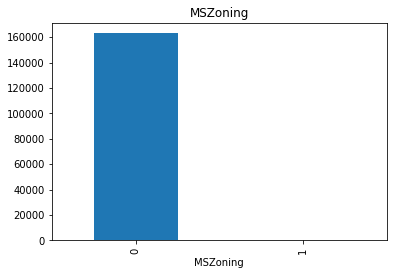

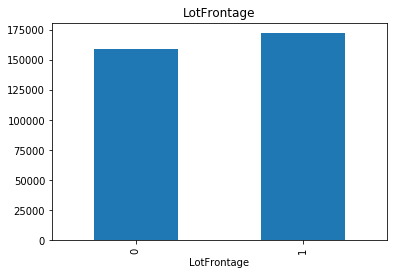

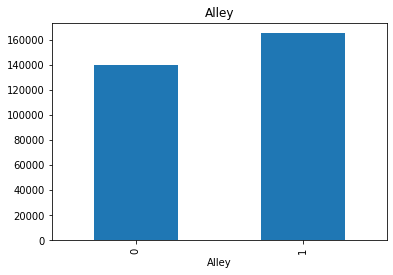

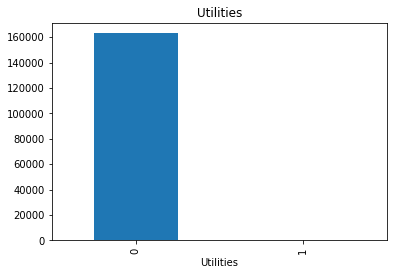

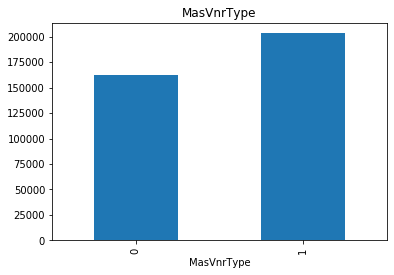

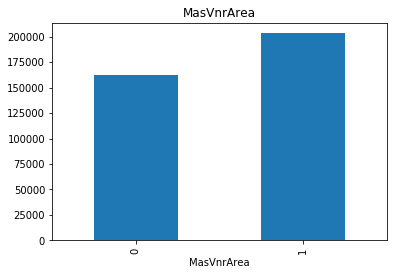

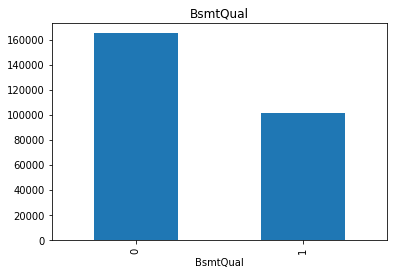

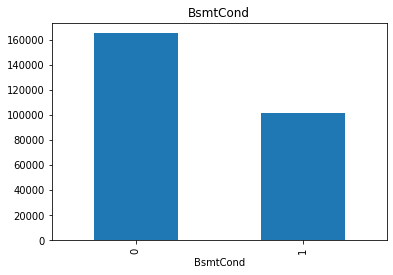

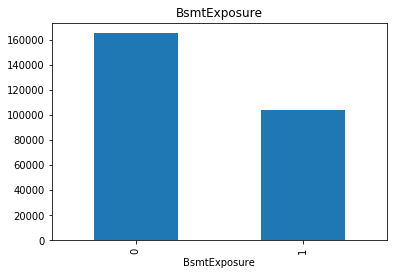

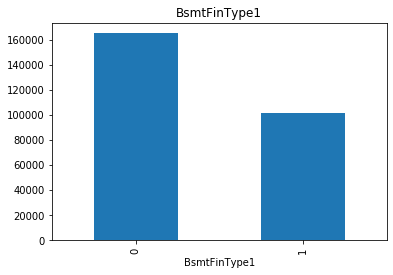

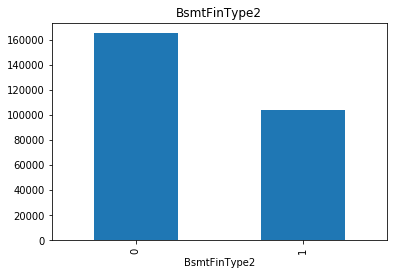

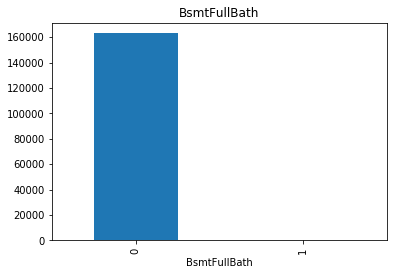

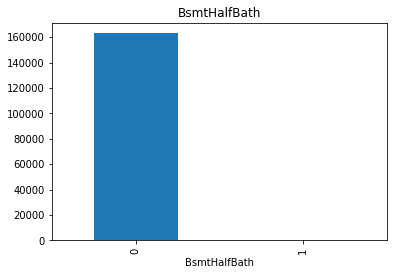

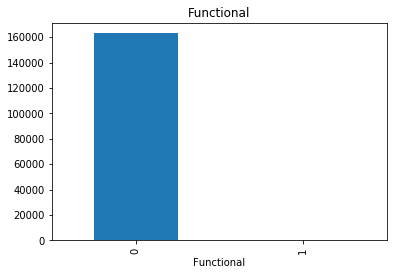

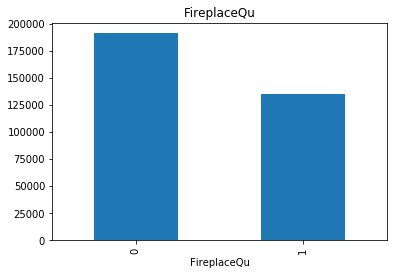

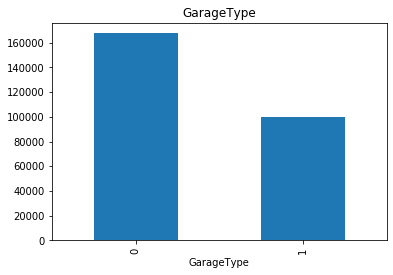

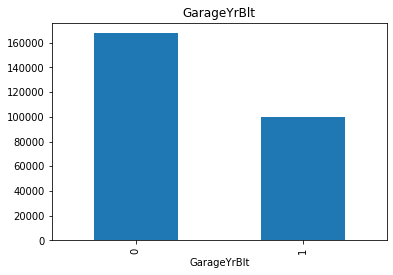

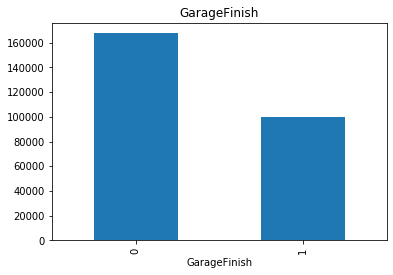

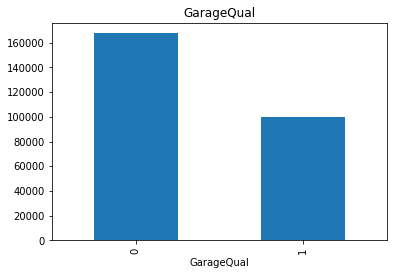

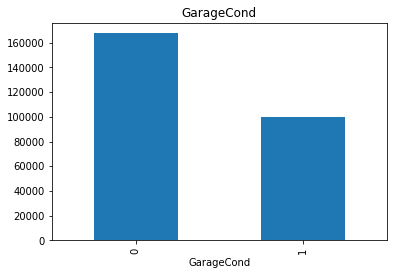

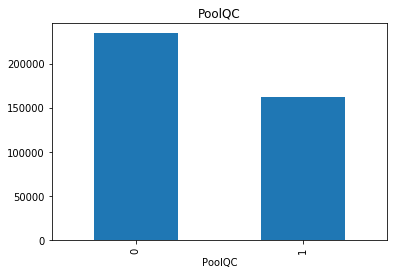

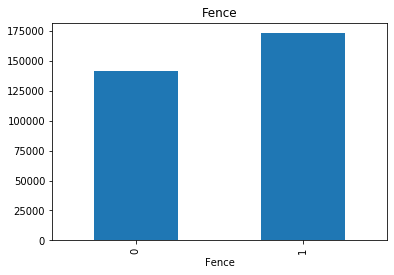

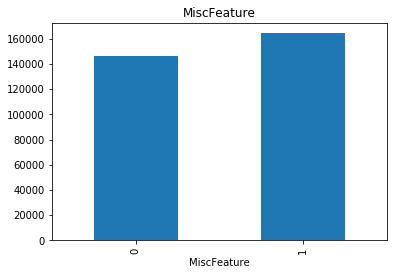

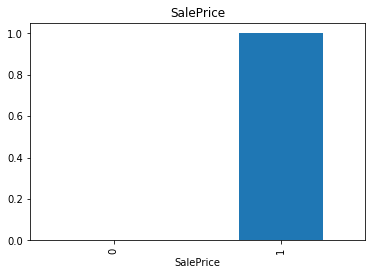

In [175]:
for feature in feature_with_nan:
    data = dataset.copy()
    
    data[feature] = np.where(data[feature].isnull(),1,0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

From the above dataset some of the features like Id is not required

In [176]:
print("ID count {}" .format(len(dataset)) )

ID count 2919


In [12]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [177]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print("count of Numerical variables" , len(numerical_features))


count of Numerical variables 38


In [178]:
dataset[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


In [179]:
year_variable = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
    
year_variable 

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House price and  year sold')

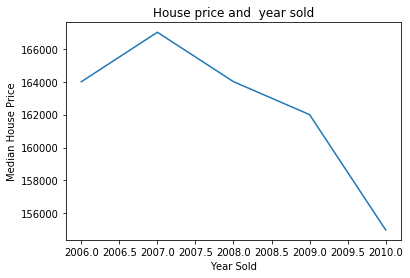

In [180]:
dataset.groupby('YrSold')['SalePrice'].median().plot()

plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House price and  year sold')

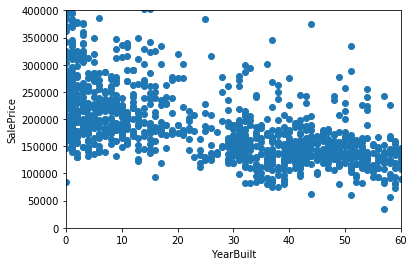

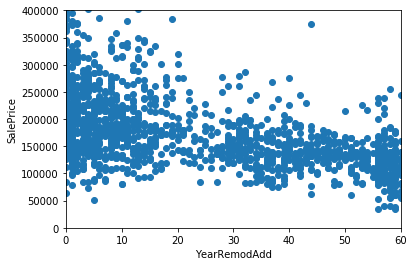

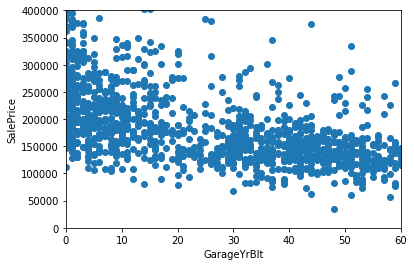

In [181]:
for feature in year_variable :
    if feature!="YrSold":
        data = dataset.copy()
        data[feature] = data["YrSold"]-data[feature]
        
        plt.figure()
        plt.axis([0,60,0,400000])
        plt.scatter(data[feature], data['SalePrice']) 
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()
        

In [182]:
discrete_variable = [ feature for feature in numerical_features if len(dataset[feature].unique()) < 25 and feature not in year_variable + ['Id']]

print("COUNT of discrete variable is {}".format(len(discrete_variable)))

COUNT of discrete variable is 14


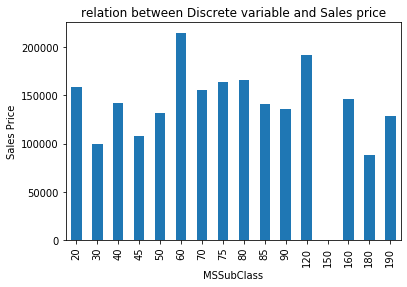

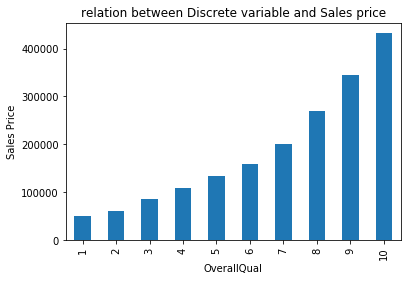

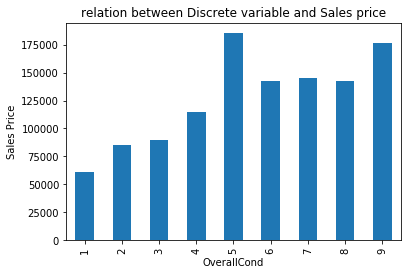

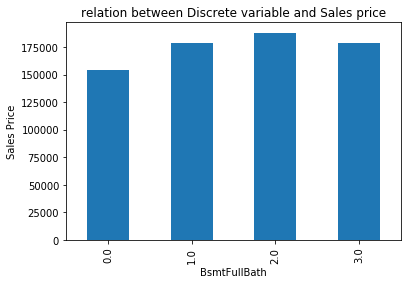

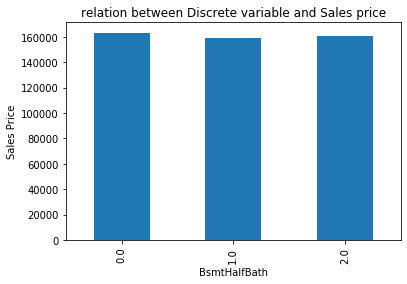

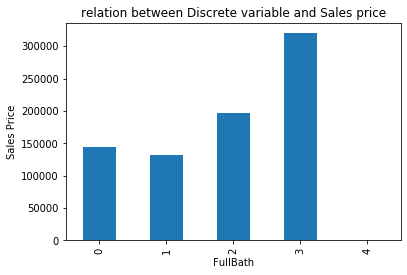

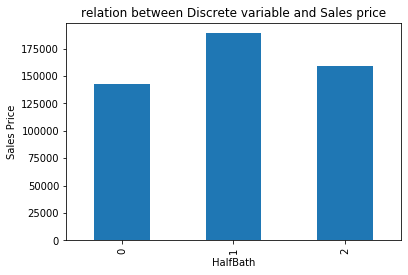

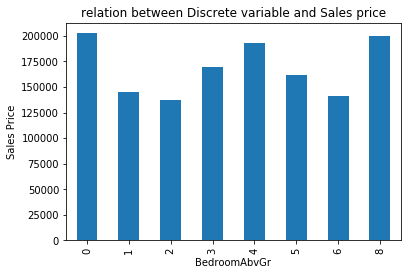

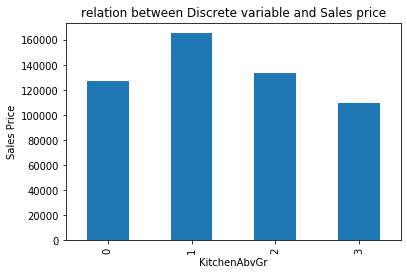

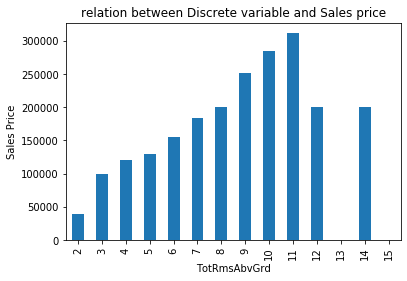

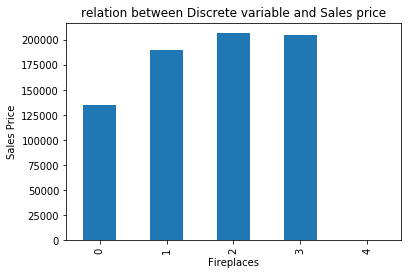

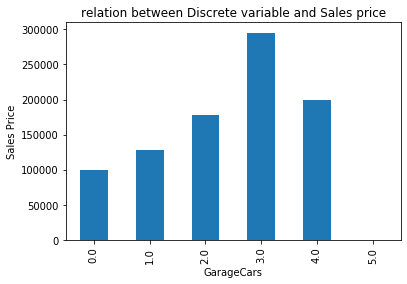

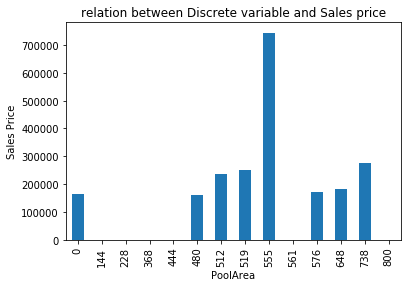

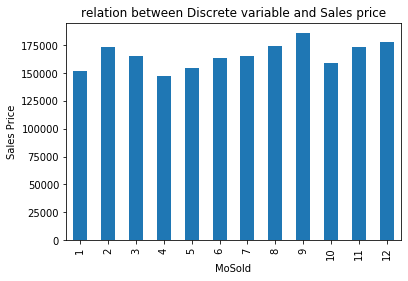

In [183]:
for feature in discrete_variable:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.title("relation between Discrete variable and Sales price")
    plt.show()

In [184]:
conti_variable = [ feature for feature in numerical_features if feature not in discrete_variable+year_variable+["Id"]]

print("COUNT of Conti variable is {}".format(len(conti_variable)))

COUNT of Conti variable is 19


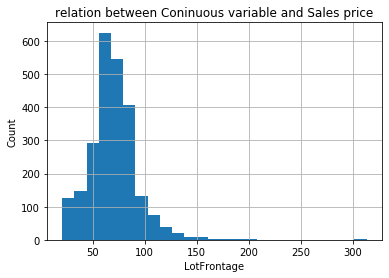

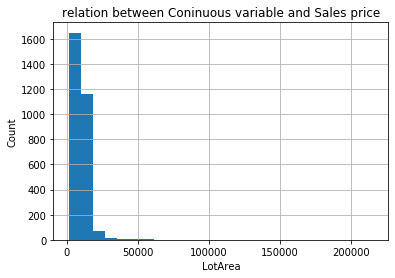

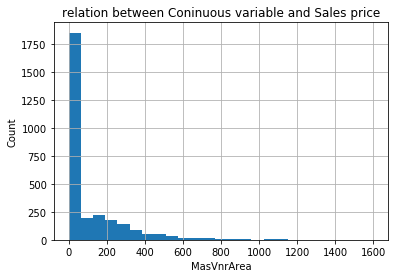

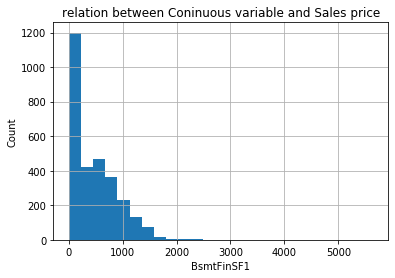

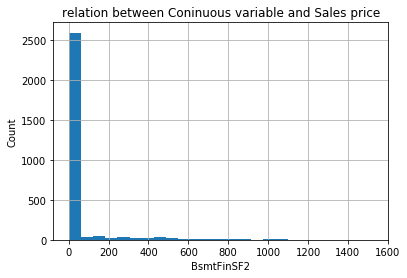

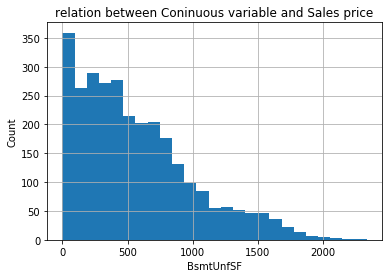

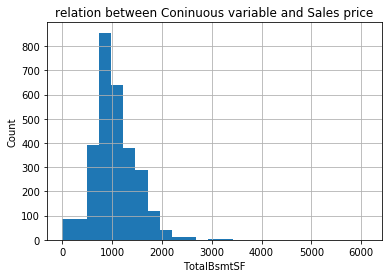

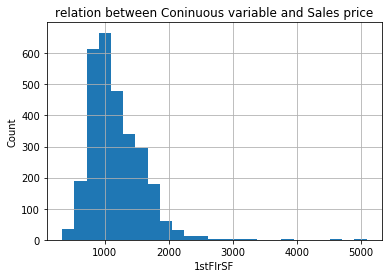

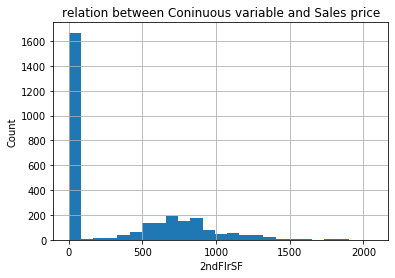

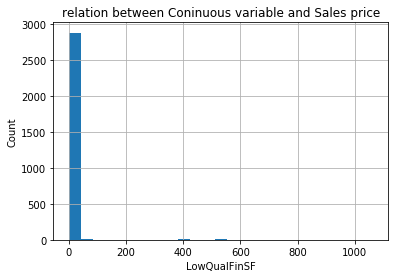

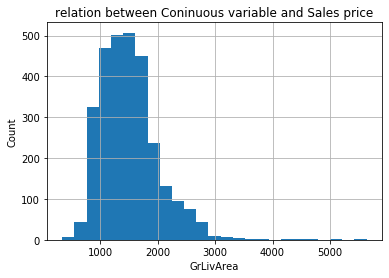

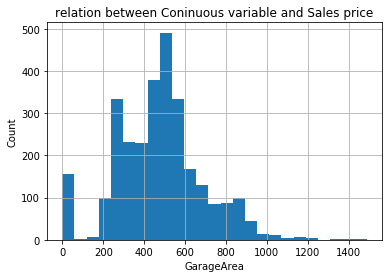

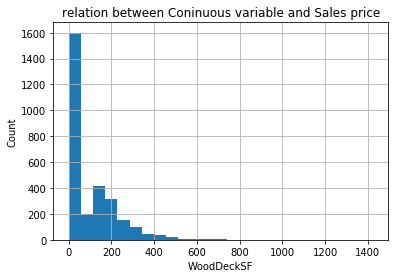

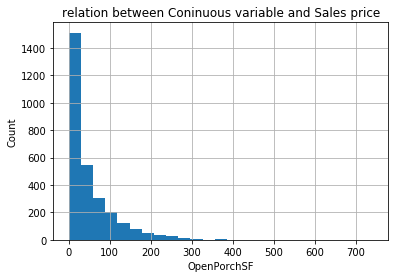

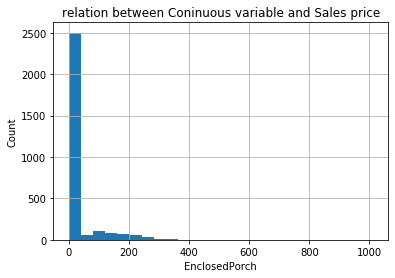

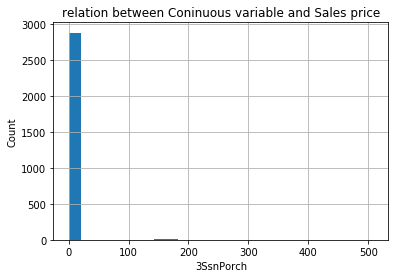

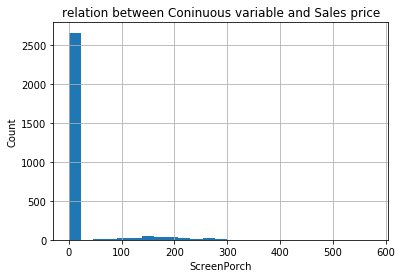

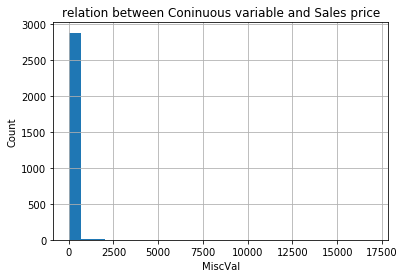

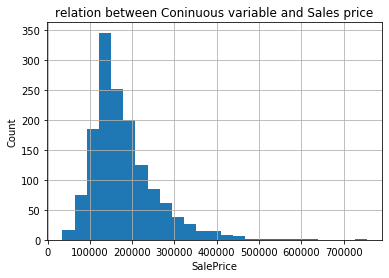

In [185]:
for feature in conti_variable:
    data = dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title("relation between Coninuous variable and Sales price")
    plt.show()

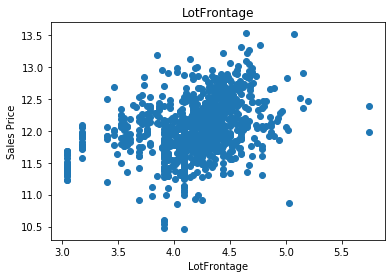

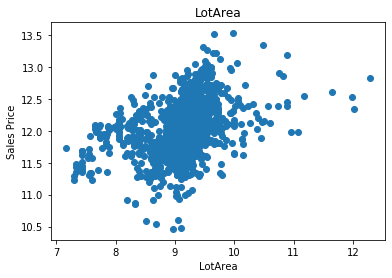

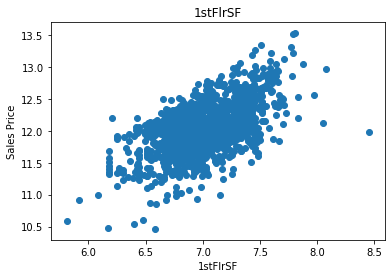

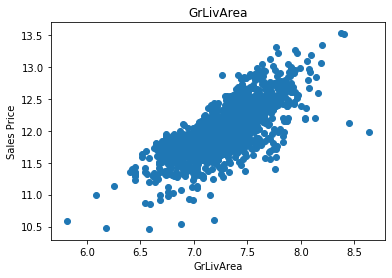

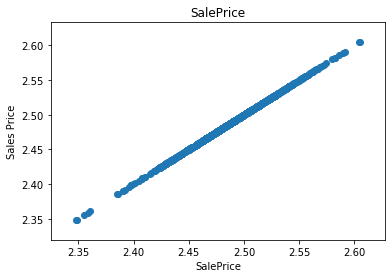

In [186]:
for feature in conti_variable:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("Sales Price")
        plt.title(feature)
        plt.show()

### OUTliers



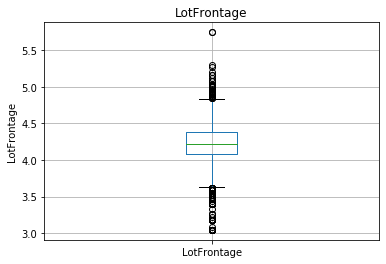

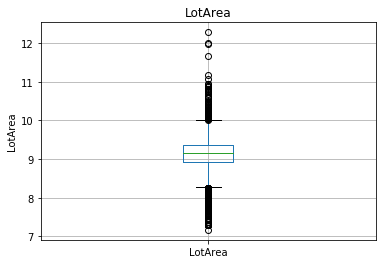

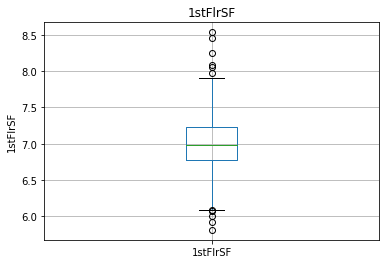

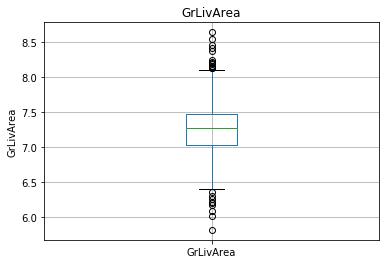

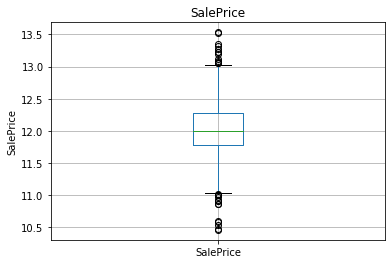

In [187]:
for feature in conti_variable:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

#### Categorical variable

In [188]:
categorical_var = [feature for feature in dataset.columns if dataset[feature].dtypes=="O"]
categorical_var

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [189]:
for feature in categorical_var:
    print( "feature is {} and categories are {}".format(feature,len(dataset[feature].unique())))

feature is MSZoning and categories are 6
feature is Street and categories are 2
feature is Alley and categories are 3
feature is LotShape and categories are 4
feature is LandContour and categories are 4
feature is Utilities and categories are 3
feature is LotConfig and categories are 5
feature is LandSlope and categories are 3
feature is Neighborhood and categories are 25
feature is Condition1 and categories are 9
feature is Condition2 and categories are 8
feature is BldgType and categories are 5
feature is HouseStyle and categories are 8
feature is RoofStyle and categories are 6
feature is RoofMatl and categories are 8
feature is Exterior1st and categories are 16
feature is Exterior2nd and categories are 17
feature is MasVnrType and categories are 5
feature is ExterQual and categories are 4
feature is ExterCond and categories are 5
feature is Foundation and categories are 6
feature is BsmtQual and categories are 5
feature is BsmtCond and categories are 5
feature is BsmtExposure and ca

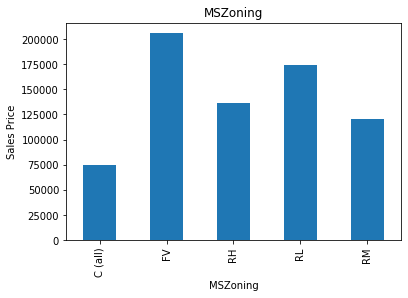

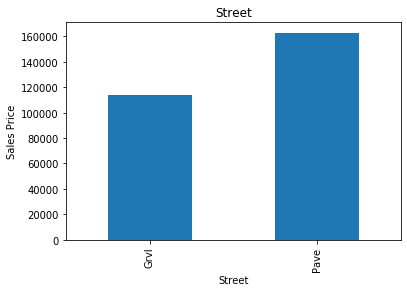

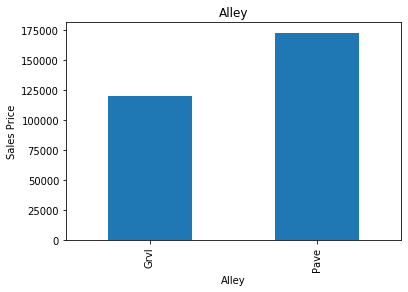

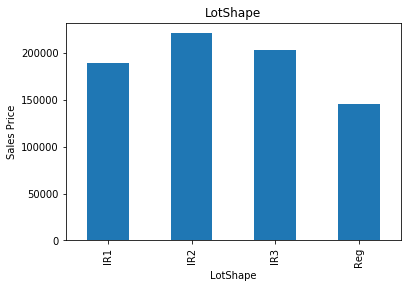

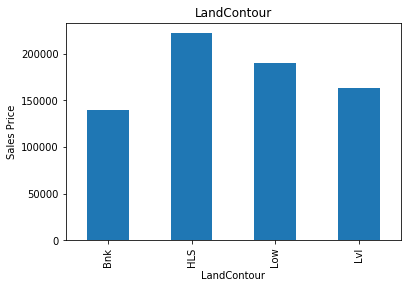

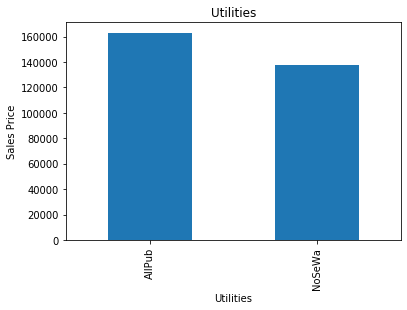

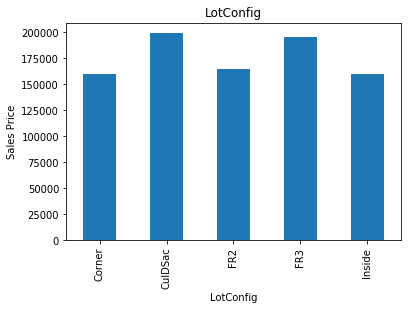

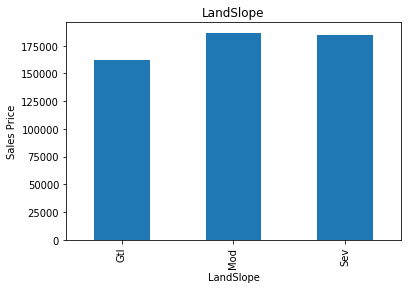

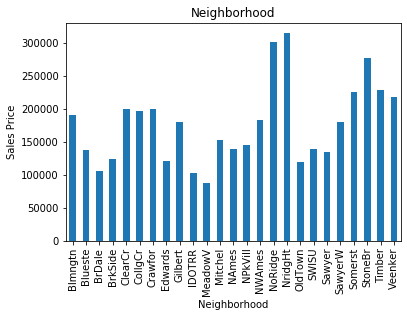

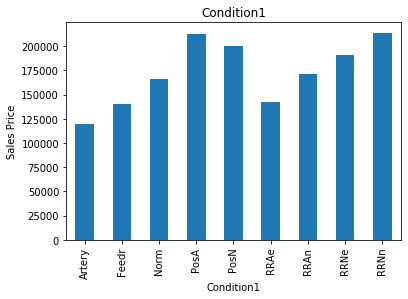

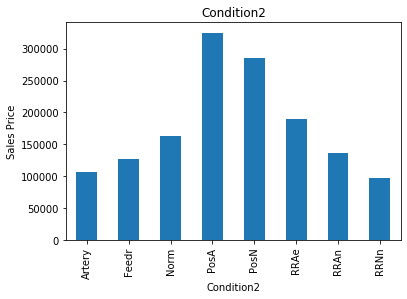

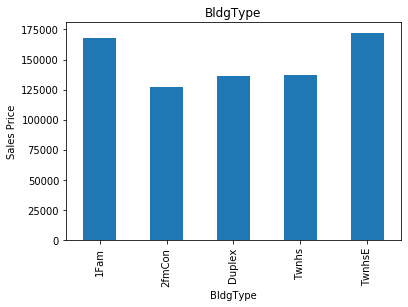

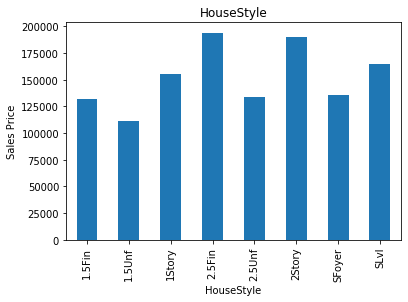

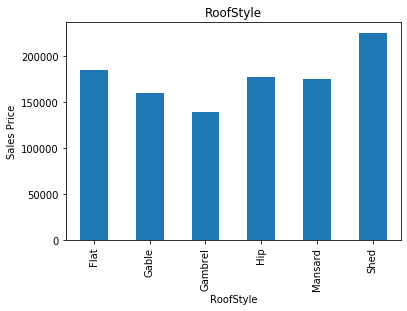

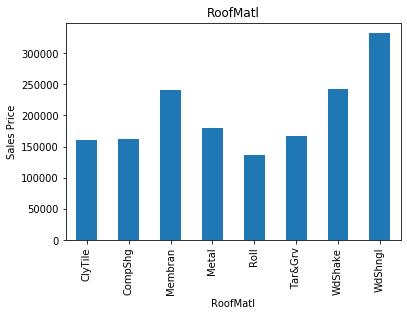

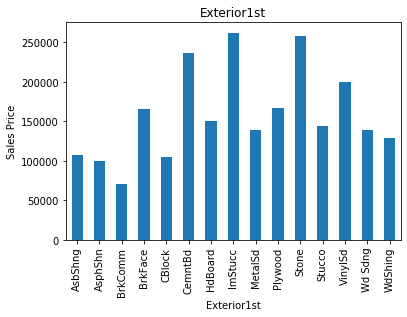

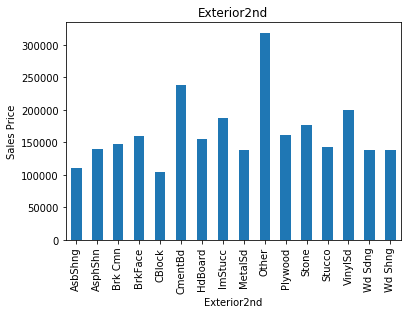

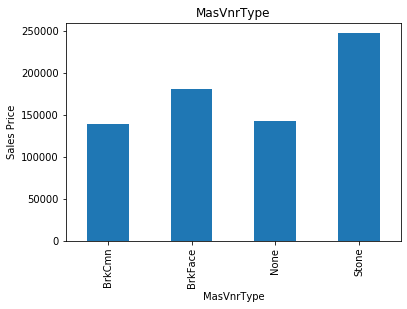

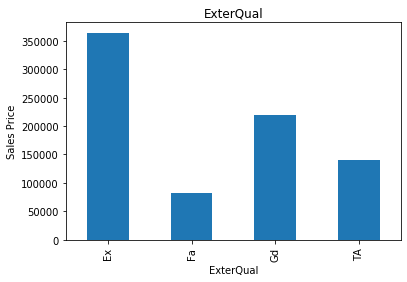

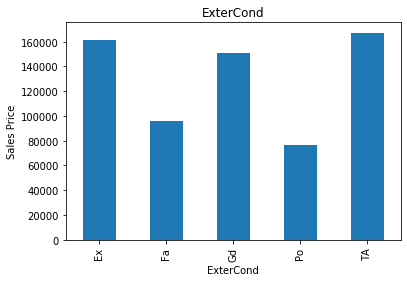

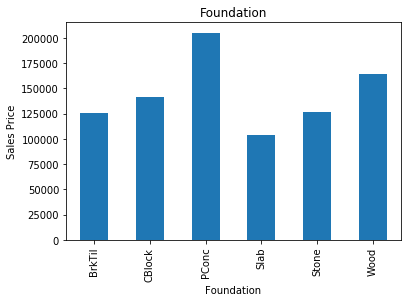

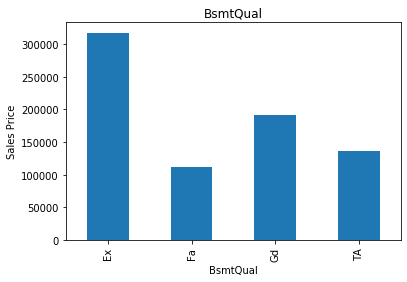

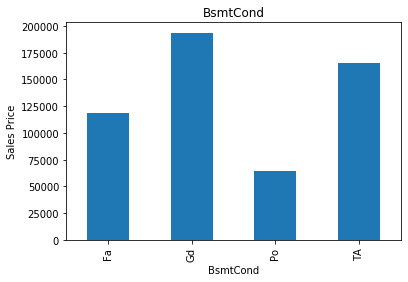

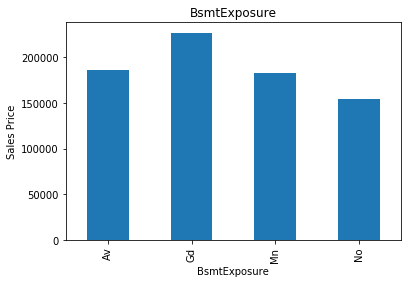

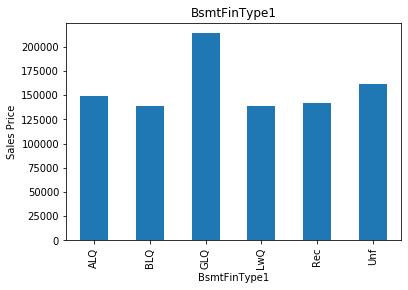

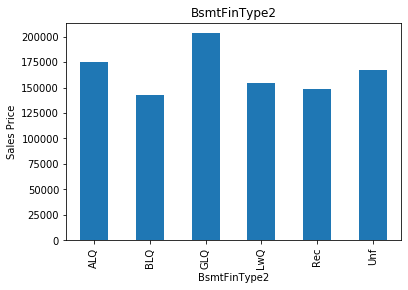

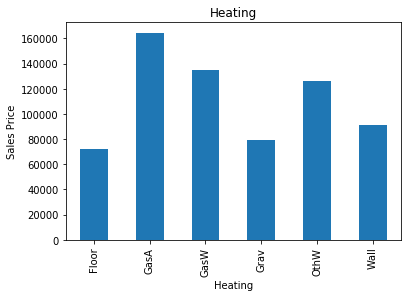

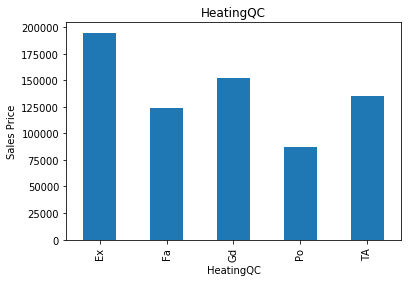

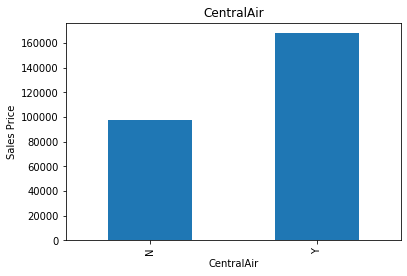

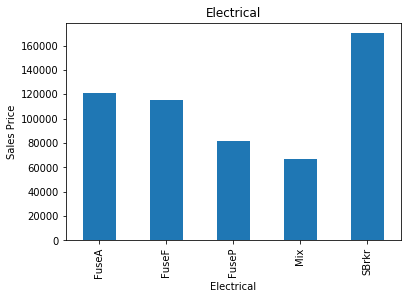

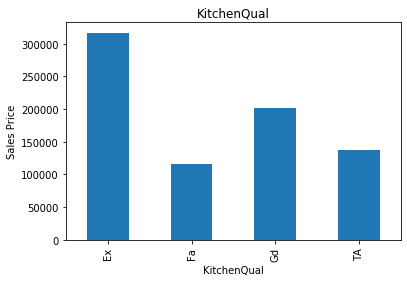

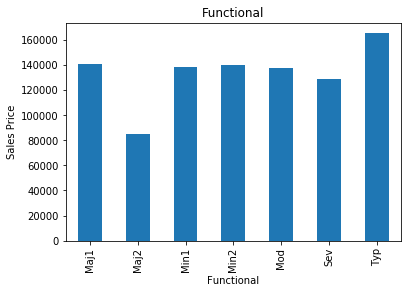

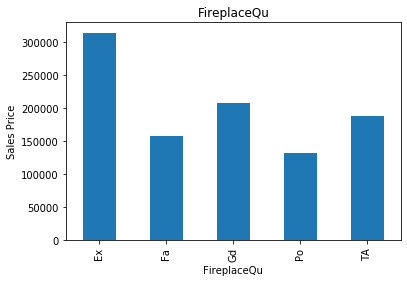

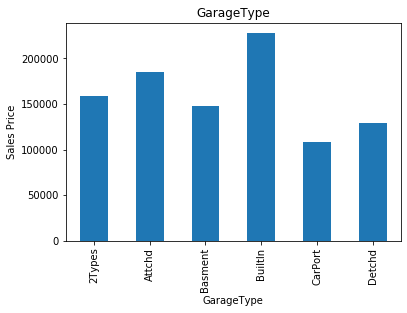

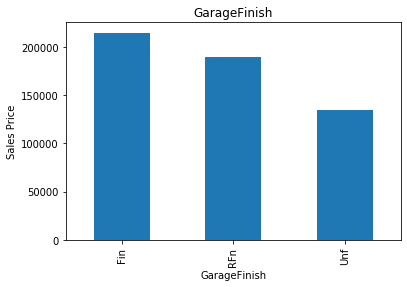

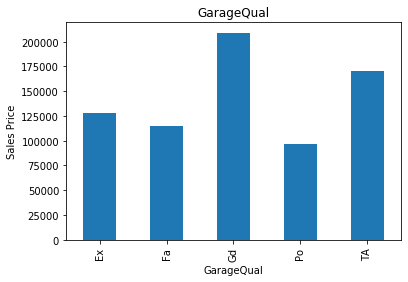

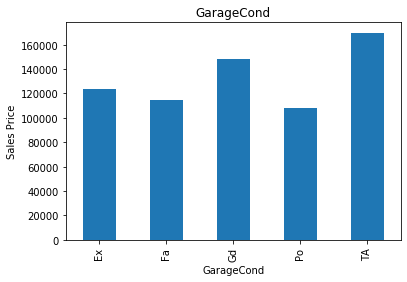

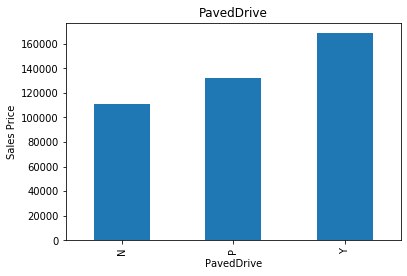

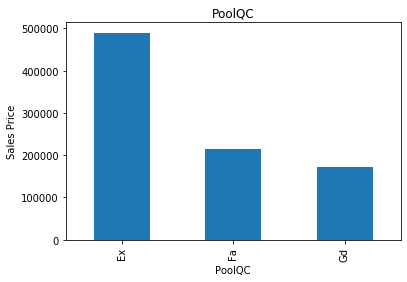

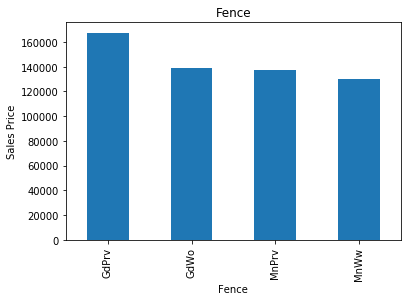

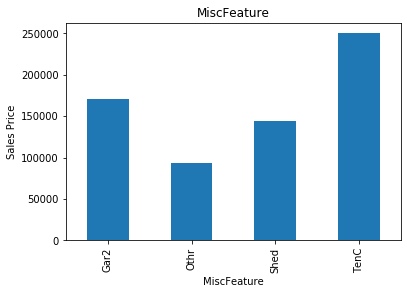

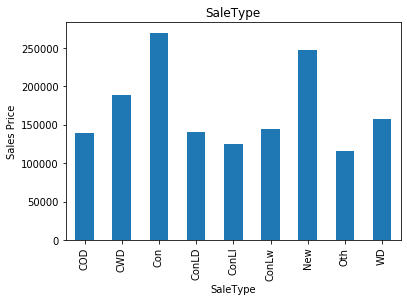

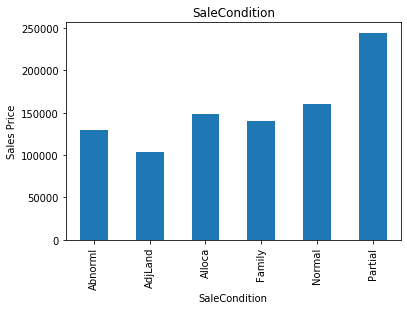

In [190]:
for feature in categorical_var:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.title(feature)
    plt.show()

In [26]:
#x_train,x_test,y_train,y_test = train_test_split(dataset,dataset['SalePrice'], random_state=0,test_size=0.3)

In [27]:
# x_train.shape,x_test.shape

((2043, 81), (876, 81))

In [191]:
categorical_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes =="O"]

In [192]:
categorical_nan

['MSZoning',
 'Alley',
 'Utilities',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [77]:
for feature in categorical_nan:
    print("{} : {} Missing percentage".format(feature,np.round(dataset[feature].isnull().mean(),4)))

MSZoning : 0.0014 Missing percentage
Alley : 0.9322 Missing percentage
Utilities : 0.0007 Missing percentage
MasVnrType : 0.0082 Missing percentage
BsmtQual : 0.0277 Missing percentage
BsmtCond : 0.0281 Missing percentage
BsmtExposure : 0.0281 Missing percentage
BsmtFinType1 : 0.0271 Missing percentage
BsmtFinType2 : 0.0274 Missing percentage
Functional : 0.0007 Missing percentage
FireplaceQu : 0.4865 Missing percentage
GarageType : 0.0538 Missing percentage
GarageFinish : 0.0545 Missing percentage
GarageQual : 0.0545 Missing percentage
GarageCond : 0.0545 Missing percentage
PoolQC : 0.9966 Missing percentage
Fence : 0.8044 Missing percentage
MiscFeature : 0.964 Missing percentage


In [193]:
def missing_cat_feature(dataset,cat_features_nan):
    data= dataset.copy()
    data[cat_features_nan]=data[cat_features_nan].fillna('missing')
    return data

dataset = missing_cat_feature(dataset,categorical_nan)
dataset[categorical_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [194]:
numerical_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes !="O" and feature not in ['SalePrice']]

In [195]:
for feature in numerical_nan:
    print("{} : {} Missing percentage".format(feature,np.round(dataset[feature].isnull().mean(),4)))

LotFrontage : 0.1665 Missing percentage
MasVnrArea : 0.0079 Missing percentage
BsmtFullBath : 0.0007 Missing percentage
BsmtHalfBath : 0.0007 Missing percentage
GarageYrBlt : 0.0545 Missing percentage


In [196]:
for feature in numerical_nan:
    median_value=dataset[feature].median()
   
    dataset[feature+'nan'] = np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [82]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,208500.0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,181500.0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,223500.0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000.0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,250000.0,0,0,0,0,0


In [197]:
for feature in year_variable :
    if feature!="YrSold":
        
        dataset[feature] = data["YrSold"]-data[feature]

In [198]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,208500.0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,181500.0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,223500.0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000.0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,250000.0,0,0,0,0,0


In [199]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features:
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])

In [200]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1.0,0.0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,208500.0,0,0,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,181500.0,0,0,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,223500.0,0,0,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000.0,0,0,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,250000.0,0,0,0,0,0


Handling rare categorical feature

In [210]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']


In [219]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [202]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [203]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1.0,0.0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,208500.0,0,0,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,181500.0,0,0,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,223500.0,0,0,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000.0,0,0,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,250000.0,0,0,0,0,0


In [46]:
temp

SaleCondition
Abnorml    0.034601
AdjLand    0.001370
Alloca     0.004111
Family     0.006852
Normal     0.410415
Partial    0.042823
Name: SalePrice, dtype: float64

In [90]:
temp_df

Index(['Abnorml', 'Normal', 'Partial'], dtype='object', name='SaleCondition')

## Feature Scaling

In [91]:
new_train = dataset.iloc[:1460,:]
new_test = dataset.iloc[1460:,:]

In [231]:
df.shape

(2919, 119)

In [206]:
data_trial = dataset.copy() 

In [212]:
def category_one_hot_encode(columns_list):
    trial_data = data_trial
    for feature in columns_list:
        
        feat_dummy= pd.get_dummies(trial_data[feature],drop_first=True)
        trial_data = pd.concat([trial_data,feat_dummy],axis=1)
        trial_data.drop([feature],axis=1,inplace=True)
    return trial_data

In [213]:
df=category_one_hot_encode(categorical_features)

In [230]:
df=df.loc[:,~df.columns.duplicated()]

In [94]:
#for feature in categorical_features:
#    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
#    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
#    new_train[feature]=new_train[feature].map(labels_ordered)

    

C:\Users\Bhavesh\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [234]:
#feature_scale=[feature for feature in df.columns if feature not in ['Id','SalePrice',]]


scaler=MinMaxScaler()
scaler.fit(df[feat])


MinMaxScaler(copy=True, feature_range=(0, 1))

In [238]:
df[feat] = scaler.transform(df[feat])

In [49]:
#new_train = scaler.transform(dataset[feature_scale])

In [51]:
#dataset = pd.DataFrame(dataset)

In [52]:
data.head(10)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1,208500.0,0.235294,0.666667,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.6875,0.666667,1.0,1.0,1.0,0.666667,0.500,0.043796,0.112903,0.0,0.0,0.857143,0.857143,0.666667,0.12250,0.666667,1.0,1.000000,0.75,0.75,0.25,1.000000,0.125089,0.8,0.00000,0.064212,0.140098,1.0,1.00,1.0,1.0,0.345385,0.413559,0.0,0.577712,0.333333,0.0,0.50,0.5,0.375,0.333333,0.50,0.461538,1.000000,0.00,0.00,0.75,0.652866,0.666667,0.4,0.368280,0.666667,1.0,1.0,0.000000,0.082210,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.090909,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
1,2,181500.0,0.000000,0.666667,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.5000,0.333333,1.0,1.0,0.8,0.555556,0.875,0.233577,0.532258,0.0,0.0,0.142857,0.142857,0.000000,0.00000,0.333333,1.0,0.666667,0.75,0.75,1.00,0.666667,0.173281,0.8,0.00000,0.121575,0.206547,1.0,1.00,1.0,1.0,0.487844,0.000000,0.0,0.470245,0.000000,0.5,0.50,0.0,0.375,0.333333,0.25,0.307692,1.000000,0.25,0.50,0.75,0.735669,0.666667,0.4,0.309140,0.666667,1.0,1.0,0.209270,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.363636,0.25,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
2,3,223500.0,0.235294,0.666667,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.6875,0.666667,1.0,1.0,1.0,0.666667,0.500,0.058394,0.129032,0.0,0.0,0.857143,0.857143,0.666667,0.10125,0.666667,1.0,1.000000,0.75,0.75,0.50,1.000000,0.086109,0.8,0.00000,0.185788,0.150573,1.0,1.00,1.0,1.0,0.371846,0.419370,0.0,0.593095,0.333333,0.0,0.50,0.5,0.375,0.333333,0.50,0.307692,1.000000,0.25,0.50,0.75,0.659236,0.666667,0.4,0.408602,0.666667,1.0,1.0,0.000000,0.056604,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.727273,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
3,4,140000.0,0.294118,0.666667,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.7500,0.666667,1.0,1.0,1.0,0.666667,0.500,0.671533,0.612903,0.0,0.0,0.285714,0.285714,0.000000,0.00000,0.333333,1.0,0.333333,0.50,1.00,0.25,0.666667,0.038271,0.8,0.00000,0.231164,0.123732,1.0,0.75,1.0,1.0,0.387847,0.366102,0.0,0.579157,0.333333,0.0,0.25,0.0,0.375,0.333333,0.50,0.384615,1.000000,0.25,0.75,0.25,0.662420,0.333333,0.6,0.431452,0.666667,1.0,1.0,0.000000,0.047170,0.268775,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.090909,0.00,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0
4,5,250000.0,0.235294,0.666667,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.0000,0.666667,1.0,1.0,1.0,0.777778,0.500,0.065693,0.161290,0.0,0.0,0.857143,0.857143,0.666667,0.21875,0.666667,1.0,1.000000,0.75,0.75,0.75,1.000000,0.116052,0.8,0.00000,0.209760,0.187398,1.0,1.00,1.0,1.0,0.452138,0.509927,0.0,0.666523,0.333333,0.0,0.50,0.5,0.500,0.333333,0.50,0.538462,1.000000,0.25,0.50,0.75,0.662420,0.666667,0.6,0.561828,0.666667,1.0,1.0,0.134831,0.113208,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,1.000000,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
5,6,143000.0,0.176471,0.666667,0.517503,0.466761,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.3750,0.666667,1.0,1.0,0.2,0.444444,0.500,0.124088,0.258065,0.0,0.0,0.857143,0.857143,0.000000,0.00000,0.333333,1.0,0.000000,0.75,0.75,0.25,1.000000,0.129

In [232]:
df.dtypes

Id                   int64
MSSubClass           int64
LotFrontage        float64
LotArea            float64
OverallQual          int64
OverallCond          int64
YearBuilt            int64
YearRemodAdd         int64
MasVnrArea         float64
BsmtFinSF1         float64
BsmtFinSF2         float64
BsmtUnfSF          float64
TotalBsmtSF        float64
1stFlrSF           float64
2ndFlrSF             int64
LowQualFinSF         int64
GrLivArea          float64
BsmtFullBath       float64
BsmtHalfBath       float64
FullBath             int64
HalfBath             int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageYrBlt        float64
GarageCars         float64
GarageArea         float64
WoodDeckSF           int64
OpenPorchSF          int64
EnclosedPorch        int64
3SsnPorch            int64
ScreenPorch          int64
PoolArea             int64
MiscVal              int64
MoSold               int64
YrSold               int64
S

In [233]:
feat

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [236]:
#df_scaled = pd.concat([df[['Id','SalePrice']].reset_index(drop=True),pd.DataFrame(scaler.transform(df[feat]),columns=feat)],axis=1)

In [99]:
new_trained_scaled.to_csv('X_train.csv',index=False)

In [245]:
df.isnull().sum()

Id                    0
MSSubClass            0
LotFrontage           0
LotArea               0
OverallQual           0
OverallCond           0
YearBuilt             0
YearRemodAdd          0
MasVnrArea            0
BsmtFinSF1            1
BsmtFinSF2            1
BsmtUnfSF             1
TotalBsmtSF           1
1stFlrSF              0
2ndFlrSF              0
LowQualFinSF          0
GrLivArea             0
BsmtFullBath          0
BsmtHalfBath          0
FullBath              0
HalfBath              0
BedroomAbvGr          0
KitchenAbvGr          0
TotRmsAbvGrd          0
Fireplaces            0
GarageYrBlt           0
GarageCars            1
GarageArea            1
WoodDeckSF            0
OpenPorchSF           0
EnclosedPorch         0
3SsnPorch             0
ScreenPorch           0
PoolArea              0
MiscVal               0
MoSold                0
YrSold                0
SalePrice          1459
LotFrontagenan        0
MasVnrAreanan         0
BsmtFullBathnan       0
BsmtHalfBathnan 

In [100]:
dataset=pd.read_csv('X_train.csv')

In [101]:
dataset.head(10)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1,208500.0,0.235294,0.666667,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.6875,0.666667,1.0,1.0,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.857143,0.857143,0.666667,0.12250,0.666667,1.0,1.000000,0.75,0.75,0.25,1.000000,0.125089,0.8,0.00000,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.000000,0.000000,0.00,0.75,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.090909,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
1,2,181500.0,0.000000,0.666667,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.5000,0.333333,1.0,1.0,0.8,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.142857,0.142857,0.000000,0.00000,0.333333,1.0,0.666667,0.75,0.75,1.00,0.666667,0.173281,0.8,0.00000,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.000000,0.333333,0.50,0.75,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.363636,0.25,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
2,3,223500.0,0.235294,0.666667,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.6875,0.666667,1.0,1.0,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.857143,0.857143,0.666667,0.10125,0.666667,1.0,1.000000,0.75,0.75,0.50,1.000000,0.086109,0.8,0.00000,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.000000,0.333333,0.50,0.75,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.727273,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
3,4,140000.0,0.294118,0.666667,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.7500,0.666667,1.0,1.0,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.285714,0.285714,0.000000,0.00000,0.333333,1.0,0.333333,0.50,1.00,0.25,0.666667,0.038271,0.8,0.00000,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.000000,0.333333,0.75,0.25,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.090909,0.00,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0
4,5,250000.0,0.235294,0.666667,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.0000,0.666667,1.0,1.0,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.857143,0.857143,0.666667,0.21875,0.666667,1.0,1.000000,0.75,0.75,0.75,1.000000,0.116052,0.8,0.00000,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.000000,0.333333,0.50,0.75,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,1.000000,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
5,6,143000.0,0.176471,0.666667,0.517503,0.466761,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.3750,0.666667,1.0,1.0,0.2,0.444444,0.500,0.117647,0.245902,0.0,0.0,0.857143,0.857143,0.0

In [108]:
dataset.dtypes

Id                   int64
SalePrice          float64
MSSubClass         float64
MSZoning           float64
LotFrontage        float64
LotArea            float64
Street             float64
Alley              float64
LotShape           float64
LandContour        float64
Utilities          float64
LotConfig          float64
LandSlope          float64
Neighborhood       float64
Condition1         float64
Condition2         float64
BldgType           float64
HouseStyle         float64
OverallQual        float64
OverallCond        float64
YearBuilt          float64
YearRemodAdd       float64
RoofStyle          float64
RoofMatl           float64
Exterior1st        float64
Exterior2nd        float64
MasVnrType         float64
MasVnrArea         float64
ExterQual          float64
ExterCond          float64
Foundation         float64
BsmtQual           float64
BsmtCond           float64
BsmtExposure       float64
BsmtFinType1       float64
BsmtFinSF1         float64
BsmtFinType2       float64
B

In [244]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [247]:
df.drop(['Id'],inplace=True,axis=1)

In [248]:
df_train = df.iloc[:1460,:]
df_test = df.iloc[1460:,:]

In [250]:
x_train,x_test,y_train,y_test = train_test_split(df_train.drop(['SalePrice'],axis=1),df_train['SalePrice'], random_state=0,test_size=0.3)

In [110]:
y_train=dataset[['SalePrice']]

In [111]:
X_train=dataset.drop(['Id','SalePrice'],axis=1)

In [115]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.01, random_state=0))
feature_sel_model.fit(X_train, y_train)

C:\Users\Bhavesh\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 648351549162.5109, tolerance: 920791133.4609977
  positive)


SelectFromModel(estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [116]:
feature_sel_model.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True])

In [117]:

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 84
selected features: 82


In [296]:
selected_feat


Index(['Neighborhood', 'YearRemodAdd'], dtype='object')

In [278]:
dataset['GarageYrBlt'].fillna((dataset['GarageYrBlt'].mean()), inplace=True)

In [258]:
model = RandomForestRegressor()

In [259]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [260]:
prediction =model.predict(x_test)

In [261]:
print("r2 value is : {}".format(model.score(x_train,y_train)))

r2 value is : 0.9784181278853776


In [262]:
print("r2 value is : {}".format(model.score(x_test,y_test)))

r2 value is : 0.8536661578397553


In [263]:
print("MAE for the test data is {}".format(metrics.mean_absolute_error(y_test,prediction)))
print("MSE for the test data is {}".format(metrics.mean_squared_error(y_test,prediction)))
print("RMSE for the test data is {}".format(np.sqrt(metrics.mean_squared_error(y_test,prediction))))

MAE for the test data is 17582.214223744293
MSE for the test data is 993459201.9491427
RMSE for the test data is 31519.187837714708


In [251]:
xgbmodel = xgb.XGBRegressor()

In [252]:
xgbmodel.fit(x_train,y_train)

[23:27:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [253]:
prediction = xgbmodel.predict(x_test)

In [254]:
print("mae:{}".format(metrics.mean_absolute_error(y_test,prediction)))
print("mse:{}".format(metrics.mean_squared_error(y_test,prediction)))
print("rmse:{}".format(np.sqrt(metrics.mean_squared_error(y_test,prediction))))

mae:17312.021885702055
mse:1056270012.0931036
rmse:32500.30787689716


In [255]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(xgbmodel, x_train,y_train, n_jobs=1, cv=5))

[23:28:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8612254829420463

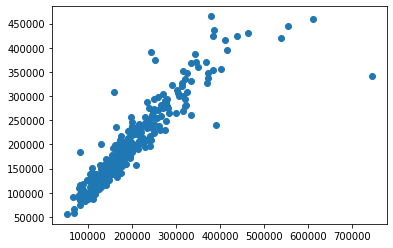

In [256]:
plt.scatter(y_test,prediction)

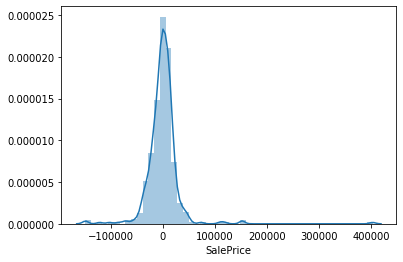

In [257]:
sns.distplot(y_test-prediction)

In [168]:
prediction

array([275603.75 , 148010.86 , 105625.17 , 211492.62 ,  85934.445,
       101165.79 , 267492.38 , 116930.7  , 394277.62 , 154644.1  ,
       208048.25 , 154006.16 , 232593.06 , 127567.125, 121095.91 ,
       146712.88 , 242831.73 , 124419.1  , 140684.48 , 190581.34 ,
       119773.73 , 151187.7  ,  92413.19 , 161002.98 , 189843.83 ,
       194977.03 , 166225.98 ,  84164.02 , 324699.97 , 110175.734,
       133098.44 , 195400.53 , 150881.25 , 284587.25 , 352516.16 ,
       188189.69 , 297179.03 , 119991.055, 228325.5  , 312451.34 ,
       207166.98 , 116100.37 , 187591.73 , 303379.8  , 340234.1  ,
       142156.31 , 123329.625, 127509.16 , 163686.1  ,  88902.23 ,
       419291.25 , 148303.45 , 160562.52 ,  83255.7  , 245139.22 ,
       105752.1  , 125870.4  , 233577.28 , 137638.62 ,  94767.36 ,
       139059.55 , 133755.97 , 135582.22 , 165003.97 , 206169.02 ,
       152336.34 , 134765.2  , 215016.45 , 125403.44 , 202895.81 ,
       182030.38 , 123951.95 ,  67930.17 , 231674.86 ,  79924.